In [32]:
# Import Python Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# preprocess
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# sklearn
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
# Read CSV file
df = pd.read_csv("datasets/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# create an instance of LabelEncoder
le = LabelEncoder()

# encode the categorical column
df["VisitorType"] = le.fit_transform(df["VisitorType"])
df["Month"] = le.fit_transform(df["Month"])
df["Revenue"] = le.fit_transform(df["Revenue"])

In [7]:
# calculate correlation matrix
corr_matrix = df.corr()

# sort correlations for column 'Revenue' in ascending order
corr_sorted = corr_matrix["Revenue"].sort_values()

# print correlations for column 'Revenue' in ascending order
corr_sorted

ExitRates                 -0.207071
BounceRates               -0.150673
VisitorType               -0.104726
SpecialDay                -0.082305
OperatingSystems          -0.014668
Region                    -0.011595
TrafficType               -0.005113
Browser                    0.023984
Weekend                    0.029295
Informational_Duration     0.070345
Month                      0.080150
Administrative_Duration    0.093587
Informational              0.095200
Administrative             0.138917
ProductRelated_Duration    0.152373
ProductRelated             0.158538
PageValues                 0.492569
Revenue                    1.000000
Name: Revenue, dtype: float64

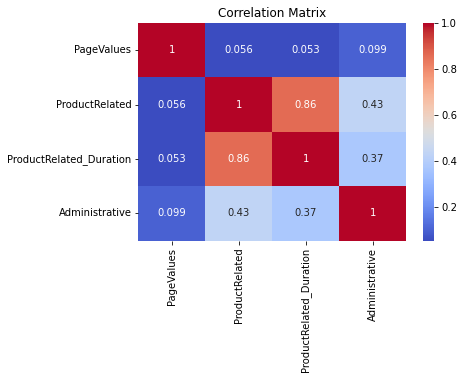

In [8]:
corr_matrix_re_calculate = df[
    ["PageValues", "ProductRelated", "ProductRelated_Duration", "Administrative"]
].corr()

# Plot correlation matrix as heatmap
sns.heatmap(corr_matrix_re_calculate, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

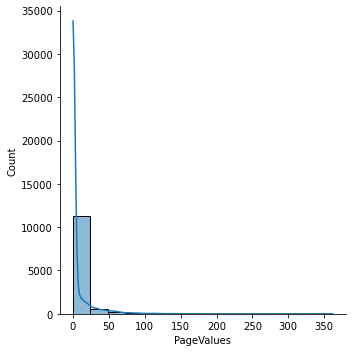

In [9]:
# Plot distribution of a column
sns.displot(df["PageValues"], kde=True)

In [19]:
# Split data into labeled and unlabeled data:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)
X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(X, y, test_size=0.8, random_state=42)

In [26]:
svm_model = SVC(kernel='rbf', gamma='scale', probability=True)
label_spread_model = LabelSpreading(kernel='knn', n_neighbors=7, alpha=0.8)
label_prop_model = LabelPropagation(kernel='knn', n_neighbors=7, max_iter=1000, tol=1e-4)

In [27]:
# Fit
svm_model.fit(X_train, y_train)
label_prop_model.fit(X_train, y_train)
label_spread_model.fit(X_train, y_train)

C:\Users\Shanover\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:316: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(


LabelSpreading(alpha=0.8, kernel='knn')

In [28]:
# Predict
y_svm_pred = svm_model.predict(X_unlabeled)
y_label_spread_pred = label_spread_model.predict(X_unlabeled)
y_label_prop_pred = label_prop_model.predict(X_unlabeled)

In [30]:
svm_accuracy = accuracy_score(y_unlabeled, y_svm_pred)
label_spread_accuracy = accuracy_score(y_unlabeled, y_label_spread_pred)
label_prop_accuracy = accuracy_score(y_unlabeled, y_label_prop_pred)
print('SVM Accuracy:',svm_accuracy)
print('Label Spread Accuracy:',label_spread_accuracy)
print('Label Propogation Accuracy:',label_prop_accuracy)

SVM Accuracy: 0.88875
Label Spread Accuracy: 0.865
Label Propogation Accuracy: 0.87625


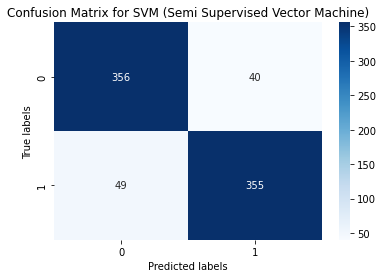

In [40]:
# SVM
# Calculate the confusion matrix
cm_lp = confusion_matrix(y_unlabeled, y_svm_pred)

# Visualize confusion matrix
sns.heatmap(cm_lp, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for SVM (Semi Supervised Vector Machine)")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

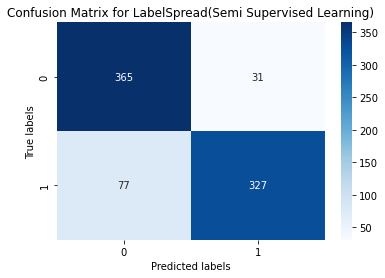

In [39]:
# Label Spread
cm_lp = confusion_matrix(y_unlabeled, y_label_spread_pred)

# Visualize confusion matrix
sns.heatmap(cm_lp, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for LabelSpread(Semi Supervised Learning)")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

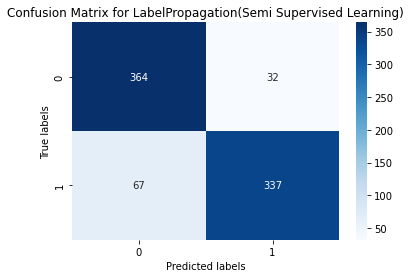

In [38]:
# Label Prop
cm_lp = confusion_matrix(y_unlabeled, y_label_prop_pred)

# Visualize confusion matrix
sns.heatmap(cm_lp, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for LabelPropagation(Semi Supervised Learning)")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()